In [52]:
import torch
from torchvision import datasets, transforms
import helper

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [53]:
image, label = next(iter(trainloader))


In [54]:
from torch import nn
import torch.nn.functional as F

# Build model with sequential

In [55]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

In [56]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [57]:
criterion = nn.NLLLoss()
epoches = 5

for i in range(epoches):
    runing_loss =0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        runing_loss+=loss.item()
        
    else:
        print(f"training losss: ",runing_loss/len(trainloader))
        
    

training losss:  1.2835615307473933
training losss:  0.6088623755903386
training losss:  0.5187654618197667
training losss:  0.47090412917803093
training losss:  0.4418070097880831


# Build model the class 

In [58]:
class classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self,x):
        
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
        

In [59]:
model1 = classifier()
criterion = nn.NLLLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.003)

In [60]:
epoches =5 
for e in range(epoches):
    runing_loss = 0
    for images,labels in trainloader:
        output = model1(images)
        loss = criterion(output,labels)
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()
        
        runing_loss += loss.item()
        
    else:
        print(f"training loss: ", runing_loss/len(trainloader))

training loss:  0.5110314157662361
training loss:  0.39375383551441023
training loss:  0.3549603005525654
training loss:  0.3300836149420438
training loss:  0.314576234311056


In [61]:
#to solve the helper package problem , i copy and past the code of view_classify
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [62]:
from matplotlib import pyplot as plt
import numpy as np

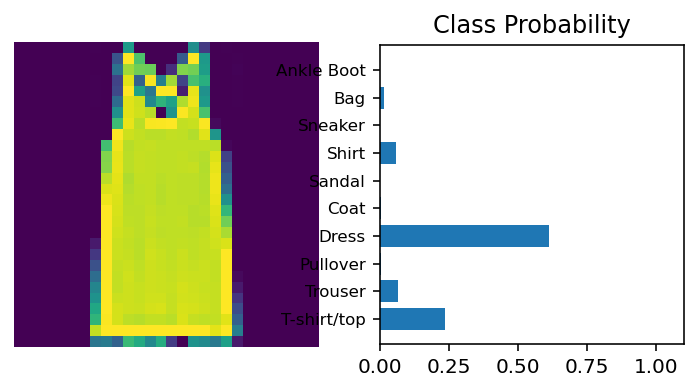

In [63]:
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

ps = torch.exp(model1(img))

view_classify(img, ps, version = 'Fashion')

# Inference

In [64]:
top_p, top_class = ps.topk(1, dim=1)
print(top_class)

tensor([[3]])


In [65]:
equals = top_class == labels.view

In [66]:
equals

False

# Build a complete model with accuracy measurement with testset

In [67]:
model = classifier()
criterion = nn.NLLLoss(reduction='sum')
optimizer = optim.Adam(model.parameters(), lr = 0.001)

epoches=30

training_loss, test_loss = [],[]

for e in range(epoches):
    tot_training_loss=0
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        output = model(images)
        loss   = criterion(output,labels)
        tot_training_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    else:
        tot_test_loss=0
        test_correct = 0
        
        with torch.no_grad():
            for images, labels in testloader:
                output = model(images)
                loss   = criterion(output,labels)
                
                tot_test_loss += loss.item()
                
                ps = torch.exp(output)
                top_p, top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                test_correct += equals.sum().item()
                
        train_los = tot_training_loss / len(trainloader.dataset)
        test_los  = tot_test_loss  / len(testloader.dataset)
        
        training_loss.append(train_los)
        test_loss.append(test_los)
        
        print("Epoch:{}/{}..".format(e+1,epoches),
             "Training loss: {:.3f}..".format(train_los),
             "Test Loss: {:.3f}..".format(test_los),
             "Test Accuracy: {:.3f}".format(test_correct/len(testloader.dataset)))


Epoch:1/30.. Training loss: 0.514.. Test Loss: 0.463.. Test Accuracy: 0.824
Epoch:2/30.. Training loss: 0.374.. Test Loss: 0.400.. Test Accuracy: 0.850
Epoch:3/30.. Training loss: 0.336.. Test Loss: 0.364.. Test Accuracy: 0.869
Epoch:4/30.. Training loss: 0.312.. Test Loss: 0.380.. Test Accuracy: 0.861
Epoch:5/30.. Training loss: 0.292.. Test Loss: 0.353.. Test Accuracy: 0.873
Epoch:6/30.. Training loss: 0.277.. Test Loss: 0.380.. Test Accuracy: 0.867
Epoch:7/30.. Training loss: 0.262.. Test Loss: 0.346.. Test Accuracy: 0.878
Epoch:8/30.. Training loss: 0.250.. Test Loss: 0.332.. Test Accuracy: 0.878
Epoch:9/30.. Training loss: 0.239.. Test Loss: 0.352.. Test Accuracy: 0.881
Epoch:10/30.. Training loss: 0.230.. Test Loss: 0.337.. Test Accuracy: 0.884
Epoch:11/30.. Training loss: 0.218.. Test Loss: 0.358.. Test Accuracy: 0.878
Epoch:12/30.. Training loss: 0.211.. Test Loss: 0.354.. Test Accuracy: 0.884
Epoch:13/30.. Training loss: 0.204.. Test Loss: 0.332.. Test Accuracy: 0.886
Epoch:14

In [68]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

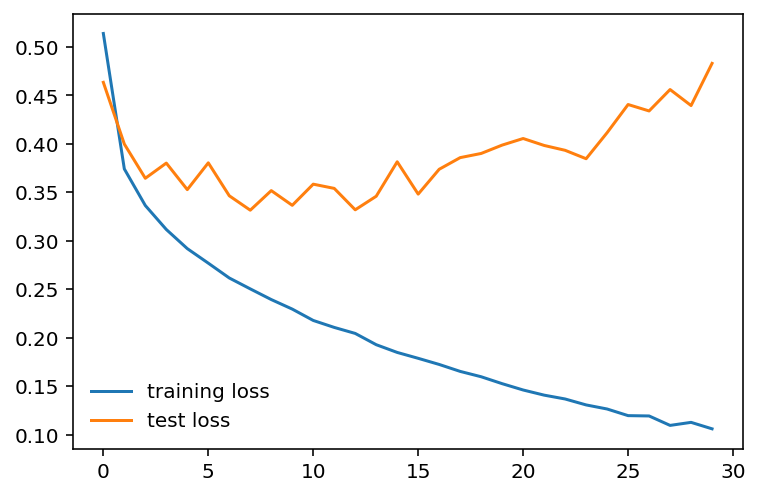

In [69]:
plt.plot(training_loss, label='training loss')
plt.plot(test_loss, label= 'test loss')
plt.legend(frameon=False)

# solve overfitting with dropout

In [70]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
        # another layer is for dropout
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self,x):
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [74]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs =30

training_loss, testing_loss = [],[]

for e in range(epochs):
    tot_train_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        tot_train_loss += loss.item()
        
        
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()    #to turn on full network and the dropout prabbility is zero
            
            for images, labels in testloader:
                output = model(images)
                #loss = criterion(output,labels)
                test_loss += criterion(output,labels)
                
                ps = torch.exp(output)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class==labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        model.train()     # the dropout prabbility is again on and it is 20% we defined
        
        training_loss.append(tot_train_loss/len(trainloader))
        testing_loss.append(test_loss / len(testloader))
        
        print("Epoch: {}/{}..".format(e+1, epochs),
             ("Traing loss: {:.3f}..".format(tot_train_loss/len(trainloader))),
             ("Testing loss: {:.3f}..".format(test_loss/len(testloader))),
             "Test Accuracy: {:.3f}..".format(accuracy/len(testloader)))
                
                

Epoch: 1/30.. Traing loss: 0.595.. Testing loss: 0.467.. Test Accuracy: 0.832..
Epoch: 2/30.. Traing loss: 0.481.. Testing loss: 0.456.. Test Accuracy: 0.835..
Epoch: 3/30.. Traing loss: 0.451.. Testing loss: 0.459.. Test Accuracy: 0.833..
Epoch: 4/30.. Traing loss: 0.433.. Testing loss: 0.427.. Test Accuracy: 0.848..
Epoch: 5/30.. Traing loss: 0.420.. Testing loss: 0.426.. Test Accuracy: 0.842..
Epoch: 6/30.. Traing loss: 0.417.. Testing loss: 0.410.. Test Accuracy: 0.856..
Epoch: 7/30.. Traing loss: 0.404.. Testing loss: 0.424.. Test Accuracy: 0.847..
Epoch: 8/30.. Traing loss: 0.394.. Testing loss: 0.395.. Test Accuracy: 0.859..
Epoch: 9/30.. Traing loss: 0.391.. Testing loss: 0.385.. Test Accuracy: 0.867..
Epoch: 10/30.. Traing loss: 0.384.. Testing loss: 0.401.. Test Accuracy: 0.863..
Epoch: 11/30.. Traing loss: 0.387.. Testing loss: 0.411.. Test Accuracy: 0.855..
Epoch: 12/30.. Traing loss: 0.383.. Testing loss: 0.388.. Test Accuracy: 0.864..
Epoch: 13/30.. Traing loss: 0.379.. T

In [75]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

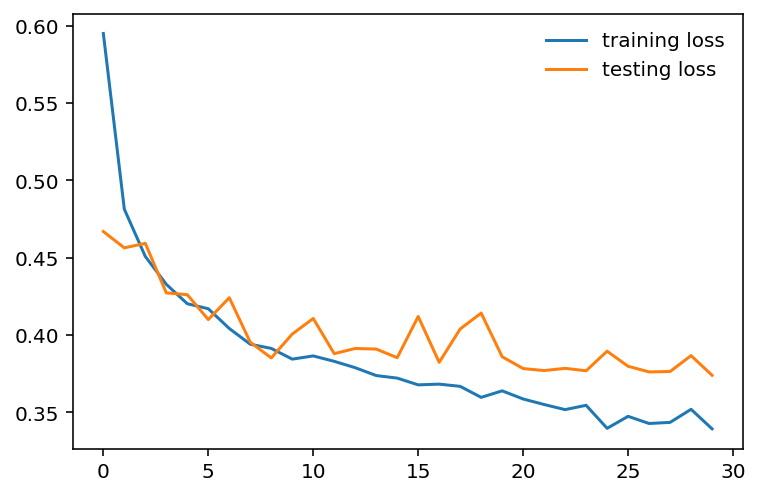

In [76]:
plt.plot(training_loss, label='training loss')
plt.plot(testing_loss, label='testing loss')
plt.legend(frameon=False)

# Inference

In [79]:
#to solve the helper package problem , i copy and past the code of view_classify
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

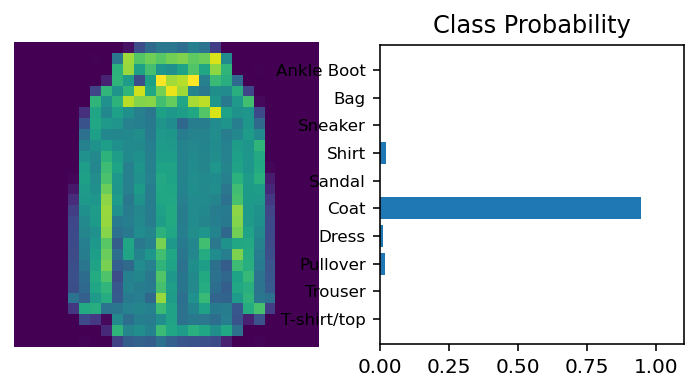

In [83]:
model.eval()

dataiter= iter(testloader)
images, labels = dataiter.next()

img= images[0]
img = img.view(1,784)

with torch.no_grad():
    output = model.forward(img)
    
ps = torch.exp(output)

view_classify(img.view(1,28,28), ps, version='Fashion')

# Save & load the model

In [86]:
print(model.state_dict().keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [88]:
torch.save(model.state_dict(), 'FashionCheckpoint.pth')

In [89]:
state_dict_fashion_trained = torch.load('FashionCheckpoint.pth')

In [90]:
model.load_state_dict(state_dict_fashion_trained)

<All keys matched successfully>

In [91]:
print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
